Độ chính xác (2 đặc trưng, không PCA): 0.96


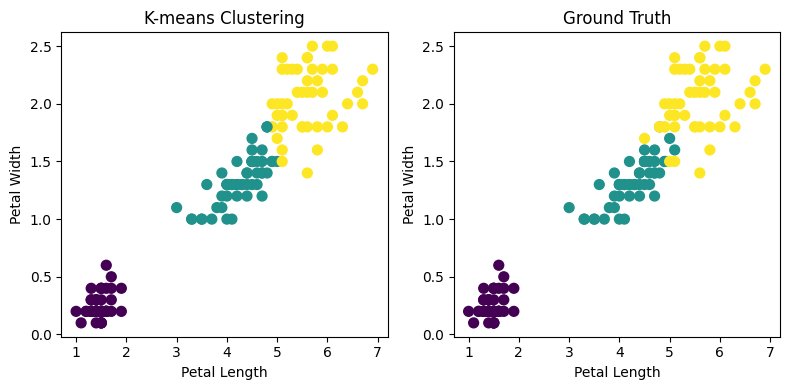

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')

# 2. Chọn 2 đặc trưng: petal_length và petal_width
X = df[['petal_length', 'petal_width']].values
y_true = df['species'].values

# 3. Mã hóa nhãn thành số
label_map = {label: idx for idx, label in enumerate(np.unique(y_true))}
y_true_encoded = np.array([label_map[label] for label in y_true])

# 4. Hàm tính khoảng cách Euclidean
def euclidean(a, b):
    return np.linalg.norm(a - b)

# 5. Khởi tạo tâm cụm ngẫu nhiên
def initialize_centroids(X, k):
    np.random.seed(0)
    idx = np.random.choice(len(X), k, replace=False)
    return X[idx]

# 6. Gán cụm cho mỗi điểm
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean(x, c) for c in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

# 7. Cập nhật lại tâm cụm
def update_centroids(X, clusters, k):
    centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) > 0:
            centroids.append(points.mean(axis=0))
        else:
            centroids.append(np.zeros(X.shape[1]))  # tránh lỗi cụm rỗng
    return np.array(centroids)

# 8. Thuật toán K-means
def kmeans(X, k=3, max_iter=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iter):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids
    return clusters, centroids

# 9. Huấn luyện
k = 3
y_pred, centroids = kmeans(X, k)

# 10. Ánh xạ lại nhãn theo cụm
def map_cluster_labels(y_pred, y_true_encoded, k=3):
    mapping = {}
    for i in range(k):
        true_labels = y_true_encoded[y_pred == i]
        if len(true_labels) > 0:
            mapping[i] = Counter(true_labels).most_common(1)[0][0]
        else:
            mapping[i] = -1
    y_mapped = np.array([mapping[c] for c in y_pred])
    return y_mapped

y_pred_mapped = map_cluster_labels(y_pred, y_true_encoded)

# 11. Độ chính xác
accuracy = np.mean(y_pred_mapped == y_true_encoded)
print(f'Độ chính xác (2 đặc trưng, không PCA): {accuracy:.2f}')

# 12. Trực quan hóa
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("K-means Clustering")
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mapped, cmap='viridis', s=50)
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.scatter(X[:, 0], X[:, 1], c=y_true_encoded, cmap='viridis', s=50)
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()


Độ chính xác (scikit-learn, 2 đặc trưng): 0.96


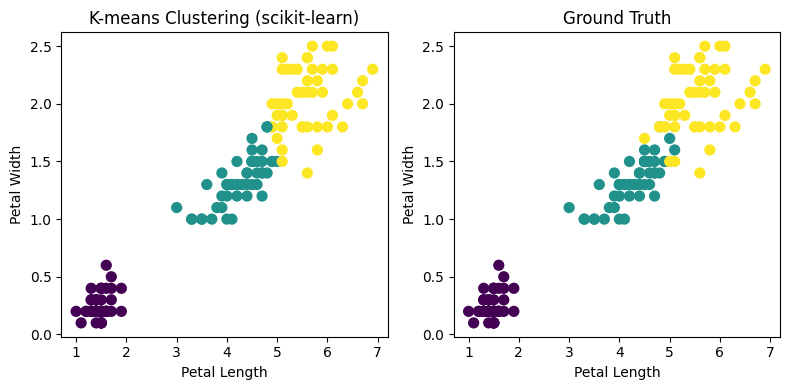

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')

# 2. Lấy 2 đặc trưng: petal_length và petal_width
X = df[['petal_length', 'petal_width']].values
y_true = df['species'].values

# 3. Mã hóa nhãn thành số
encoder = LabelEncoder()
y_true_encoded = encoder.fit_transform(y_true)

# 4. Dùng KMeans từ scikit-learn
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# 5. Ánh xạ nhãn KMeans sang đúng nhãn thật
def map_labels(y_pred, y_true):
    labels = np.zeros_like(y_pred)
    for i in range(3):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask], keepdims=False).mode
    return labels

y_pred_mapped = map_labels(y_pred, y_true_encoded)

# 6. Độ chính xác
acc = accuracy_score(y_true_encoded, y_pred_mapped)
print(f'Độ chính xác (scikit-learn, 2 đặc trưng): {acc:.2f}')

# 7. Vẽ biểu đồ phân cụm và nhãn thật
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("K-means Clustering (scikit-learn)")
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mapped, cmap='viridis', s=50)
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.scatter(X[:, 0], X[:, 1], c=y_true_encoded, cmap='viridis', s=50)
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()
